In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score
pd.options.display.float_format = "{:,.2f}".format
import sys
sys.path.append("../")
from src import soporte_ajuste as sa

In [2]:
df = pd.read_csv("../data/autorenew_clean_estandar_sin_out_enc.csv", index_col=0)

In [3]:
df.head()

,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,price_knn,monthOfRegistration_knn,postalCode_knn,powerCV_estandar,kilometer_estandar,yearOfRegistration_estandar
0,Golf_3_1.6,"10,690.28","10,690.43","10,881.72","11,782.79","7,912.58","19,432.72","8,753.18","14,478.71","20,760.72",2016-03-24 00:00:00,2016-04-07 03:16:57,"2,990.00",6.00,"49,733.00",-0.05,0.61,-0.02
1,A5_Sportback_2.7_Tdi,"10,690.28","10,690.43","10,881.72","24,522.52","7,912.58","22,216.94","10,392.23","12,732.91","6,147.93",2016-03-24 00:00:00,2016-04-07 01:46:50,"18,300.00",5.00,"66,954.00",0.39,-0.02,0.07
2,"Jeep_Grand_Cherokee_""Overland""","10,690.28","10,690.43","10,881.72","13,006.87","13,095.47","9,876.84","10,392.23","11,828.02","20,760.72",2016-03-14 00:00:00,2016-04-05 12:47:46,"9,800.00",8.00,"90,480.00",0.25,-0.02,-0.01
3,GOLF_4_1_4__3TÜRER,"10,690.28","10,690.43","10,881.72","5,558.22","7,912.58","19,432.72","8,753.18","14,478.71","8,559.12",2016-03-17 00:00:00,2016-03-17 17:40:17,"1,500.00",6.00,"91,074.00",-0.21,0.61,-0.04
4,Skoda_Fabia_1.4_TDI_PD_Classic,"10,690.28","10,690.43","10,881.72","5,558.22","7,912.58","4,127.68","10,392.23","6,310.38","8,559.12",2016-03-31 00:00:00,2016-04-06 10:17:21,"3,600.00",7.00,"60,437.00",-0.24,-0.89,0.04


In [4]:
df_analize = df.drop(columns=['name','dateCreated','lastSeen'])

In [5]:
df_analize.head()

,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,price_knn,monthOfRegistration_knn,postalCode_knn,powerCV_estandar,kilometer_estandar,yearOfRegistration_estandar
0,"10,690.28","10,690.43","10,881.72","11,782.79","7,912.58","19,432.72","8,753.18","14,478.71","20,760.72","2,990.00",6.00,"49,733.00",-0.05,0.61,-0.02
1,"10,690.28","10,690.43","10,881.72","24,522.52","7,912.58","22,216.94","10,392.23","12,732.91","6,147.93","18,300.00",5.00,"66,954.00",0.39,-0.02,0.07
2,"10,690.28","10,690.43","10,881.72","13,006.87","13,095.47","9,876.84","10,392.23","11,828.02","20,760.72","9,800.00",8.00,"90,480.00",0.25,-0.02,-0.01
3,"10,690.28","10,690.43","10,881.72","5,558.22","7,912.58","19,432.72","8,753.18","14,478.71","8,559.12","1,500.00",6.00,"91,074.00",-0.21,0.61,-0.04
4,"10,690.28","10,690.43","10,881.72","5,558.22","7,912.58","4,127.68","10,392.23","6,310.38","8,559.12","3,600.00",7.00,"60,437.00",-0.24,-0.89,0.04


In [6]:
# instanciamos la clase de regresión lineal
analisis = sa.AnalisisModelosRegresion(dataframe=df_analize, variable_dependiente='price_knn')

# llamamos a la función para ajustar el modelo
analisis.ajustar_modelo(modelo='tree')

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = analisis.obtener_resultados()
df_resultados.head()

,Real,Predicho,Conjunto,Modelo,Residuos
281331,"1,500.00","1,500.00",Train,tree,0.00
122061,"3,000.00","3,000.00",Train,tree,0.00
204257,"3,125.00","3,125.00",Train,tree,0.00
77827,0.00,0.00,Train,tree,0.00
180278,"2,150.00","2,150.00",Train,tree,0.00


In [ ]:
analisis.plot_residuos("tree")

In [9]:
analisis.calcular_metricas("tree")

,train,test
R2,1.00,-237.89
MAE,11.07,"20,681.21"
MSE,"36,573.92","1,763,436,038,276.82"
RMSE,191.24,"1,327,944.29"


d:\workspace\laboratorio-modulo8-leccion02-completo\notebooks\..\src\soporte_ajuste.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Predictor", data=importancia_df, palette="viridis")


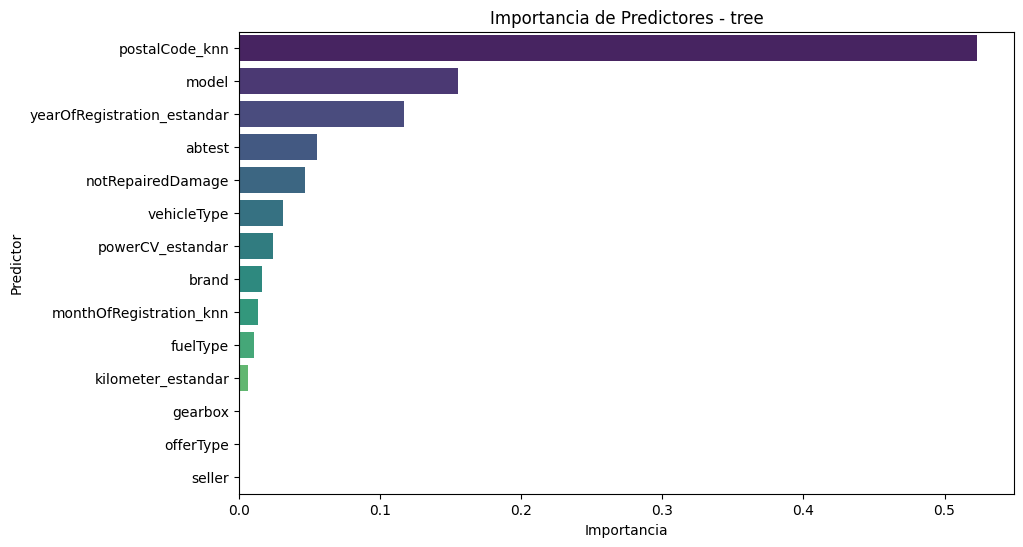

,Predictor,Importancia
10,postalCode_knn,0.52
5,model,0.16
13,yearOfRegistration_estandar,0.12
2,abtest,0.06
8,notRepairedDamage,0.05
3,vehicleType,0.03
11,powerCV_estandar,0.02
7,brand,0.02
9,monthOfRegistration_knn,0.01
6,fuelType,0.01


In [10]:
analisis.importancia_predictores("tree")